In [72]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn', stakeoverflow suggestion
import matplotlib.pyplot as plt
from matplotlib import colors                 #from documentation
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [260]:
train = pd.read_csv("train.csv") 
test =  pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [261]:
train_df = train       #copy of train and test
test_df = test

In [262]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [381]:
train_df.dtypes   #https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [382]:
test_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [265]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [266]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [267]:
train_df.describe()     #https://medium.com/analytics-vidhya/statistical-analysis-in-python-using-pandas-27c6a4209de2

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [326]:
train_df.nunique()  #https://www.statology.org/pandas-count-unique-values/#:~:text=You%20can%20use%20the%20nunique,values%20in%20a%20pandas%20DataFrame.

HomePlanet         4
CryoSleep          2
Destination        4
Age               81
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Transported        2
dtype: int64

In [385]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html#:~:text=Apply%20a%20function%20groupby%20to%20each%20row%20or%20column%20of%20a%20DataFrame.&text=Groupby%20one%20column%20and%20return,remaining%20columns%20in%20each%20group.&text=Groupby%20two%20columns%20and%20return%20the%20mean%20of%20the%20remaining%20column.&text=1.0%205.0%202.0-,Groupby%20one%20column%20and%20return%20the%20mean,particular%20column%20in%20the%20group.

,HomePlanet,Transported
0,0.0,0.658846
2,2.0,0.523024
3,3.0,0.512438
1,1.0,0.423946


In [386]:
train_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [272]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)


,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [387]:
train_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [274]:
train_df[['Cabin', 'Transported']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Cabin,Transported
6559,T/3/P,1.0
2004,E/513/S,1.0
4581,G/1012/P,1.0
4580,G/1011/S,1.0
2008,E/516/P,1.0
...,...,...
4263,F/797/P,0.0
4264,F/797/S,0.0
2295,F/1077/P,0.0
2291,F/1075/P,0.0


In [275]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [388]:
train_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [277]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


In [329]:
train_df['HomePlanet']=train_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2, "not available":3})  #https://towardsdatascience.com/how-to-replace-values-in-pandas-609ba7a031c9
train_df['HomePlanet'].value_counts()     #https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column,in%20the%20column%20%E2%80%9Ccondition%E2%80%9D.

1.0    4602
0.0    2131
2.0    1759
3.0     201
Name: HomePlanet, dtype: int64

In [332]:
test_df['HomePlanet']=test_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2,"not available":3})
test_df['HomePlanet'].value_counts()

1.0    2263
0.0    1002
2.0     925
3.0      87
Name: HomePlanet, dtype: int64

In [331]:
train_df['Destination']=train_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
train_df['Destination'].value_counts()

0.0    5915
2.0    1982
1.0     796
Name: Destination, dtype: int64

In [330]:
test_df['Destination']=test_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test_df['Destination'].value_counts()

0.0    2956
2.0     933
1.0     388
Name: Destination, dtype: int64

In [284]:
train_df["CryoSleep"] = train_df["CryoSleep"].fillna(True)   #https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
test_df["CryoSleep"] = test_df["CryoSleep"].fillna(True)
train_df["CryoSleep"]

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: bool

In [285]:
train_df["CryoSleep"].value_counts()

False    5439
True     3254
Name: CryoSleep, dtype: int64

In [286]:
train_df["CryoSleep"] = train_df["CryoSleep"].astype(int) 
train_df["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 8693, dtype: int32

In [287]:
train_df["CryoSleep"].value_counts()

0    5439
1    3254
Name: CryoSleep, dtype: int64

In [288]:
train_df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [289]:
train_df["VIP"] = train_df["VIP"].fillna(True)
test_df["VIP"] = test_df["VIP"].fillna(True)
train_df["VIP"]

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: bool

In [290]:
train_df["VIP"].value_counts()

False    8291
True      402
Name: VIP, dtype: int64

In [293]:
test_df["VIP"].value_counts()

False    4110
True      167
Name: VIP, dtype: int64

In [294]:
train_df["VIP"] = train_df["VIP"].astype(int)

train_df["VIP"].value_counts()

0    8291
1     402
Name: VIP, dtype: int64

In [295]:
test_df["VIP"] = test_df["VIP"].astype(int)

In [296]:
train_df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [389]:
train_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [390]:
test_df.dtypes

HomePlanet      float64
CryoSleep       float64
Destination     float64
Age             float64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [299]:
train_df = train_df.drop("PassengerId",axis = 1)
test_df = test_df.drop("PassengerId",axis = 1)

In [300]:
train_df = train_df.drop("Cabin",axis = 1)
test_df = test_df.drop("Cabin",axis = 1)

In [301]:
train_df = train_df.drop("Name",axis = 1)
test_df = test_df.drop("Name",axis = 1)

In [328]:
train_df["VIP"] = train_df["VIP"].astype("float64")
test_df["VIP"] = test_df["VIP"].astype("float64")
train_df["CryoSleep"] = train_df["CryoSleep"].astype("float64")
test_df["CryoSleep"] = test_df["CryoSleep"].astype("float64")

In [372]:
columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
columns

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [373]:
for col in columns:
    print(train_df[col].max())
    print(test_df[col].max())

3.0
3.0
1.0
1.0
2.0
2.0
79.0
79.0
1.0
1.0
14327.0
11567.0
29813.0
25273.0
23492.0
8292.0
22408.0
19844.0
24133.0
22272.0


In [320]:
#https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

train_df["HomePlanet"].fillna("not available",inplace = True)
test_df["HomePlanet"].fillna("not available",inplace = True)

train_df["Destination"].fillna("55 Cancri e",inplace = True)
test_df["Destination"].fillna("55 Cancri e",inplace = True)
 
 

for col in ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]:
        train_df[col].fillna(train[col].mean() ,inplace = True)
        test_df[col].fillna(train[col].mean(),inplace = True)

In [308]:
test_df.isnull().sum()  #https://towardsdatascience.com/count-nan-values-pandas-27a50acfc929

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [342]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

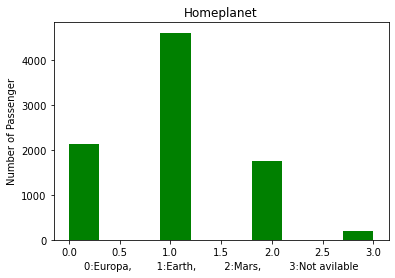

In [353]:
#https://www.youtube.com/watch?v=oETDriX9n1w&list=PLeo1K3hjS3uu4Lr8_kro2AqaO6CFYgKOl&index=3
plt.hist(train_df["HomePlanet"], color = 'g')
plt.xlabel("0:Europa,        1:Earth,         2:Mars,         3:Not avilable")
plt.ylabel("Number of Passenger")
plt.title("Homeplanet")
plt.show()

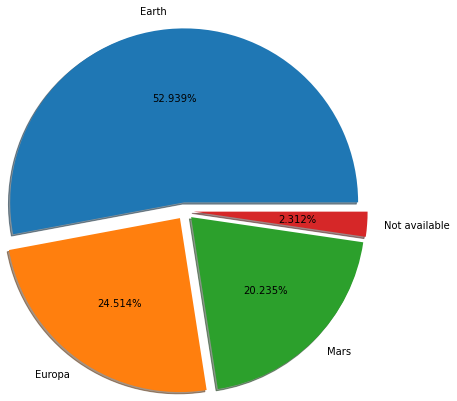

In [347]:
plt.pie(train_df["HomePlanet"].value_counts(), labels = ["Earth", "Europa", "Mars","Not available"], radius = 2, explode = [0.1,0.1,0.1,0.1], shadow = True, autopct = "%.3f%%")
plt.show()

In [348]:
# train_df['Destination']=train_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
# train_df['Destination'].value_counts()

0.0    5915
2.0    1982
1.0     796
Name: Destination, dtype: int64

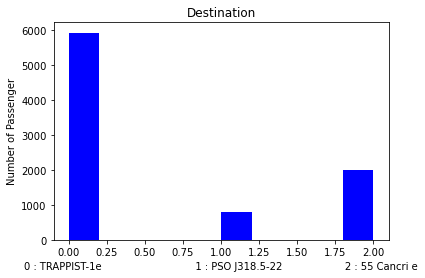

In [368]:
plt.hist(train_df['Destination'],color = "b")
plt.xlabel("0 : TRAPPIST-1e" + " "*30 + "1 : PSO J318.5-22" + " "*20 +  "2 : 55 Cancri e")
plt.ylabel("Number of Passenger")
plt.title("Destination")
plt.show()

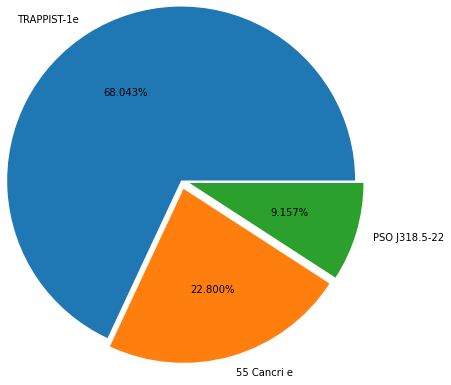

In [357]:
plt.pie(train_df['Destination'].value_counts(), labels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], radius = 2, autopct = "%.3f%%", explode = [0, 0.1,0.1])
plt.show()

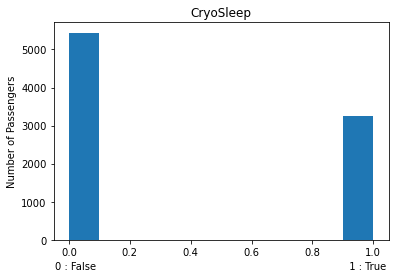

In [365]:
plt.hist(train_df["CryoSleep"])
plt.xlabel("0 : False " + "  "*40 + "1 : True")
plt.ylabel("Number of Passengers")
plt.title("CryoSleep")
plt.show()

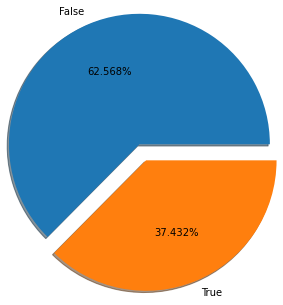

In [377]:
plt.pie(train_df["CryoSleep"].value_counts(), radius = 1.5, labels = ["False", "True"], autopct = "%.3f%%", explode = [0.1, 0.1], shadow = True)
plt.show()

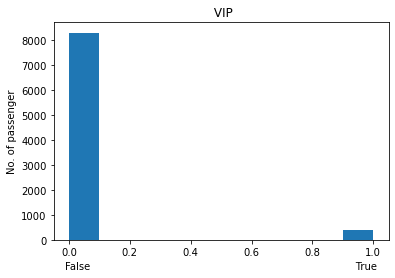

In [380]:
plt.hist(train_df["VIP"])
plt.xlabel("False" + " "*85 + "True")
plt.ylabel("No. of passenger")
plt.title(" VIP")
plt.show()

In [314]:
a = train_df
a

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True
8691,0.0,0.0,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False


In [315]:
b = test_df
b

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,0.0,27.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,19.00000,0.0,0.0,9.0,0.0,2823.0,0.0
2,0.0,1.0,2.0,31.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,38.00000,0.0,0.0,6652.0,0.0,181.0,585.0
4,1.0,0.0,0.0,20.00000,0.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,1.0,1.0,0.0,34.00000,0.0,0.0,0.0,0.0,0.0,0.0
4273,1.0,0.0,0.0,42.00000,0.0,0.0,847.0,17.0,10.0,144.0
4274,2.0,1.0,2.0,28.82793,0.0,0.0,0.0,0.0,0.0,0.0
4275,0.0,0.0,2.0,28.82793,0.0,0.0,2680.0,0.0,0.0,523.0


In [334]:
#https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
X_train = train_df.drop("Transported", axis = 1)
Y_train = train_df["Transported"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((8693, 10), (8693,), (4277, 10))

In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
#https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.89

In [337]:
pred = Y_pred.astype(str)
# pred
pred = np.char.replace(pred,"0", "False")  #https://www.geeksforgeeks.org/numpy-string-operations-replace-function/
pred = np.char.replace(pred,"1", "True")
pred = pred.astype(str)
pred

array(['True', 'False', 'True', ..., 'True', 'True', 'False'], dtype='<U5')

In [338]:
len(pred)

4277

In [339]:
submission["Transported"] = pred

In [340]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [341]:
submission.to_csv('my_submission.csv',index=False)